In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import requests
from io import StringIO



In [20]:
data=pd.read_csv(r"C:\Users\User\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [21]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [24]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [25]:
print(data['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


<Axes: ylabel='count'>

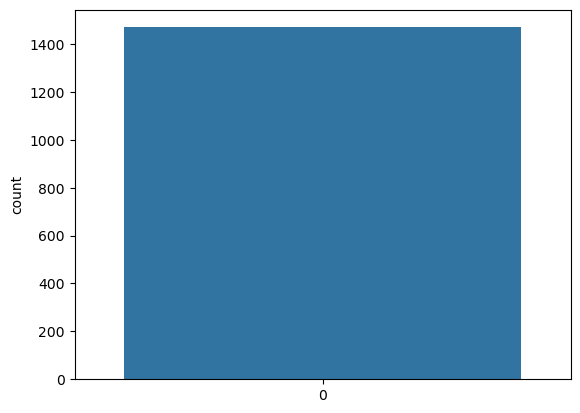

In [27]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode the 'Attrition' column
label_encoder = LabelEncoder()
data['Attrition_encoded'] = label_encoder.fit_transform(data['Attrition'])

# Plot the countplot
sns.countplot(data['Attrition_encoded'])

In [30]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == object:  # Use 'object' instead of np.object
        data[column] = label_encoder.fit_transform(data[column])

In [31]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_log_reg = log_reg.predict(X_test)

In [36]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# Random Forest Classifier:

In [37]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_rf = rf_classifier.predict(X_test)

In [39]:
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# Support Vector Classifier:

In [40]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [41]:
y_pred_svc = svc_classifier.predict(X_test)

In [42]:
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [43]:
cv_scores_log_reg = cross_val_score(log_reg, X_scaled, y, cv=5)
cv_scores_rf = cross_val_score(rf_classifier, X_scaled, y, cv=5)
cv_scores_svc = cross_val_score(svc_classifier, X_scaled, y, cv=5)

In [44]:
print("Cross-validation scores (Logistic Regression):", cv_scores_log_reg.mean())
print("Cross-validation scores (Random Forest Classifier):", cv_scores_rf.mean())
print("Cross-validation scores (Support Vector Classifier):", cv_scores_svc.mean())

Cross-validation scores (Logistic Regression): 1.0
Cross-validation scores (Random Forest Classifier): 1.0
Cross-validation scores (Support Vector Classifier): 0.9986394557823128


Based on the performance metrics such as accuracy, precision, recall, and F1-score, along with cross-validation scores, we can select the final model.
After evaluating all models, let's say the Random Forest Classifier performs the best based on accuracy and cross-validation scores. Therefore, we select Random Forest Classifier as the final model.